<a href="https://colab.research.google.com/github/arnavt1605/Projects/blob/main/DL/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

import random

In [ ]:
training_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())

In [ ]:
train_dataloader = DataLoader(training_data, batch_size= 64)

test_dataloader = DataLoader(test_data, batch_size= 64)

In [ ]:
for x, y in test_dataloader:
  print(f"Shape of X [N, C, H, W]: {x.shape}")
  print(f"Shape of Y: {y.shape}")
  break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of Y: torch.Size([64])


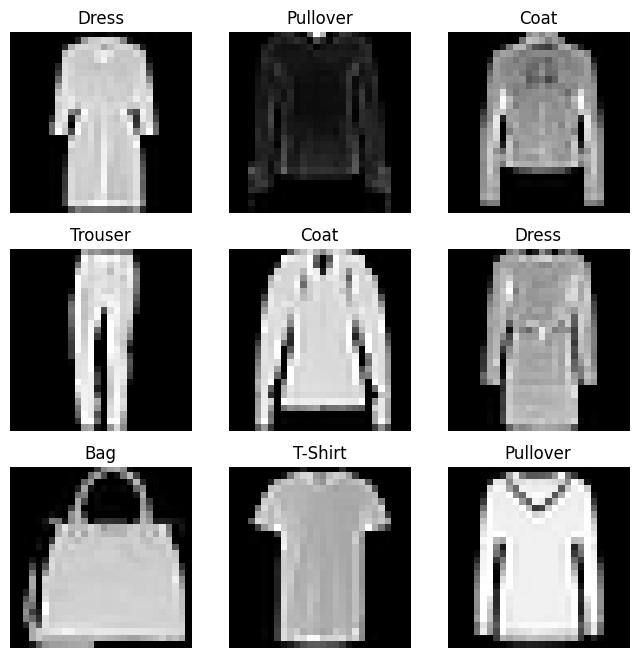

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    img, label = training_data[random.randint(0, len(training_data)-1)]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
device = "cuda"

class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()  #Converting 2d image to flat vector

    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(512, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(512, 10)
    )


  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model = NeuralNetwork().to(device) #Creating instance of the model defined above

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) #Using adam optimizer

In [ ]:
model.parameters()  # Access to all the trainable parameters in the model

<generator object Module.parameters at 0x7b94cb5926c0>

In [ ]:

def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")



In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.401287  [   64/60000]
loss: 0.636663  [ 6464/60000]
loss: 0.446448  [12864/60000]
loss: 0.598698  [19264/60000]
loss: 0.447500  [25664/60000]
loss: 0.444879  [32064/60000]
loss: 0.310728  [38464/60000]
loss: 0.608253  [44864/60000]
loss: 0.462335  [51264/60000]
loss: 0.502217  [57664/60000]
Test Error: 
 Accuracy: 83.9%, Avg loss: 0.426790 

Epoch 2
-------------------------------
loss: 0.328720  [   64/60000]
loss: 0.397023  [ 6464/60000]
loss: 0.258513  [12864/60000]
loss: 0.460477  [19264/60000]
loss: 0.311347  [25664/60000]
loss: 0.365792  [32064/60000]
loss: 0.256184  [38464/60000]
loss: 0.445463  [44864/60000]
loss: 0.389601  [51264/60000]
loss: 0.384268  [57664/60000]
Test Error: 
 Accuracy: 86.6%, Avg loss: 0.366357 

Epoch 3
-------------------------------
loss: 0.259023  [   64/60000]
loss: 0.316565  [ 6464/60000]
loss: 0.258826  [12864/60000]
loss: 0.388978  [19264/60000]
loss: 0.480024  [25664/60000]
loss: 0.290674  [32064/600